# Lasso with High Missing Rate

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 1

matplotlib.rcParams['font.family'] = 'IPAexGothic'

%config InlineBackend.figure_formats = {'png', 'retina'}


Bad key "backend in file /Users/masui/.matplotlib/matplotlibrc, line 1 ('"backend : Tkagg"')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import sys
sys.path += ['..']

from spmimage.linear_model.hmlasso import HMLasso

## Boston House-Price Dataset

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target
pd.DataFrame(X[:10], columns=boston.feature_names)

/Users/masui/develop/spm-image/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split data
test_size = 0.2
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state
)

y_train_dual = np.array([y_train, y_train+1]).T

# standardize data
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

## Lasso Regression

### sklearn Lasso

In [5]:
from sklearn.linear_model import Lasso

alpha = 0.1
num_test = 30

lasso = Lasso(alpha=alpha, fit_intercept=True)

In [6]:
%%time
lasso.fit(X_train, y_train)

CPU times: user 1.36 ms, sys: 892 µs, total: 2.25 ms
Wall time: 1.69 ms


Lasso(alpha=0.1)

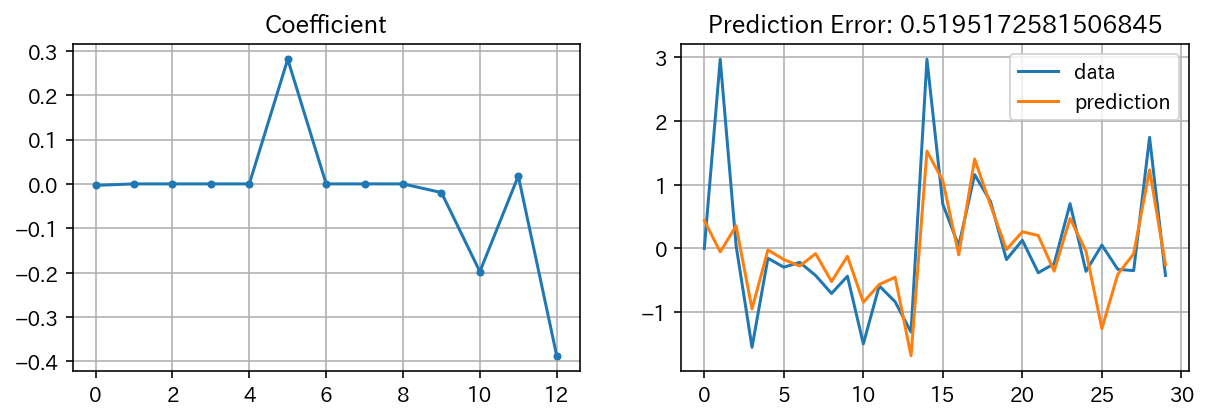

In [7]:
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.plot(lasso.coef_, '.-')
plt.grid()
plt.title('Coefficient')
plt.subplot(1,2,2)
plt.plot(y_test[:num_test], label='data')
plt.plot(lasso.predict(X_test[:num_test]), label='prediction')
# plt.plot(y[:num_test], label='data')
# plt.plot(lasso.predict(X[:num_test]), label='prediction')
plt.legend()
plt.grid()
plt.title(f'Prediction Error: {lasso.score(X_test[:num_test], y_test[:num_test])}')
plt.show()

### HMLasso with no missed data

Given no missed data, then perform as Lasso.

In [8]:
hmlasso = HMLasso(alpha=alpha, mu_coef=1.0, mu_cov=0.1)

In [9]:
%%time
hmlasso.fit(X_train, y_train)
# hmlasso.fit(X, y)

CPU times: user 3.42 ms, sys: 1.83 ms, total: 5.25 ms
Wall time: 2.19 ms


HMLasso(alpha=0.1, mu_cov=0.1)

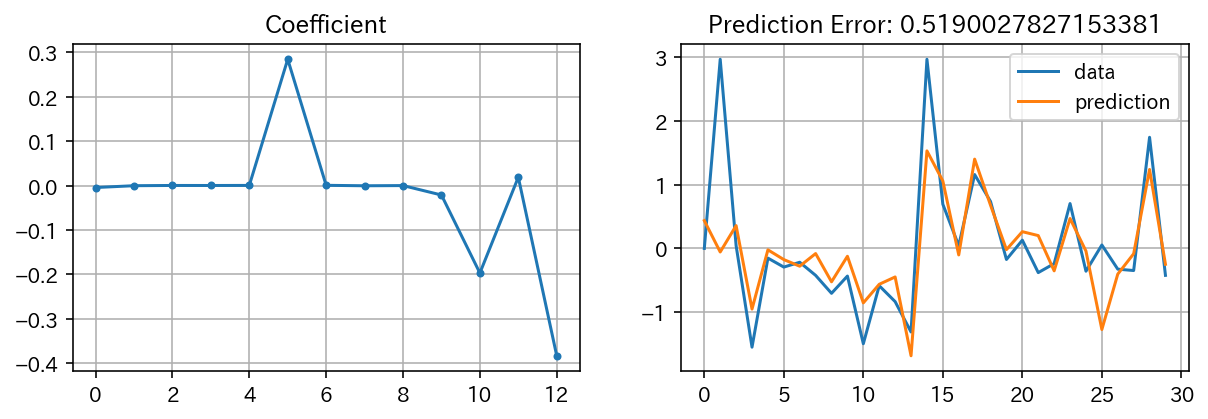

In [10]:
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.plot(hmlasso.coef_, '.-')
plt.grid()
plt.title('Coefficient')
plt.subplot(1,2,2)
plt.plot(y_test[:num_test], label='data')
plt.plot(hmlasso.predict(X_test[:num_test]), label='prediction')
# plt.plot(y[:num_test], label='data')
# plt.plot(hmlasso.predict(X[:num_test]), label='prediction')
plt.legend()
plt.grid()
plt.title(f'Prediction Error: {hmlasso.score(X_test[:num_test], y_test[:num_test])}')
# plt.title(f'Prediction Error: {hmlasso.score(X[:num_test], y[:num_test])}')
plt.show()

### HMLasso with randomly missed data

In [11]:
X_randomly_missed = np.copy(X_train)
np.random.seed(0)
rand = np.random.rand(*X_train.shape)

# 25% missed
X_randomly_missed[rand > 0.75] = np.nan

In [12]:
%%time
hmlasso.fit(X_randomly_missed, y_train)

CPU times: user 3.74 ms, sys: 1.94 ms, total: 5.68 ms
Wall time: 2.36 ms


HMLasso(alpha=0.1, mu_cov=0.1)

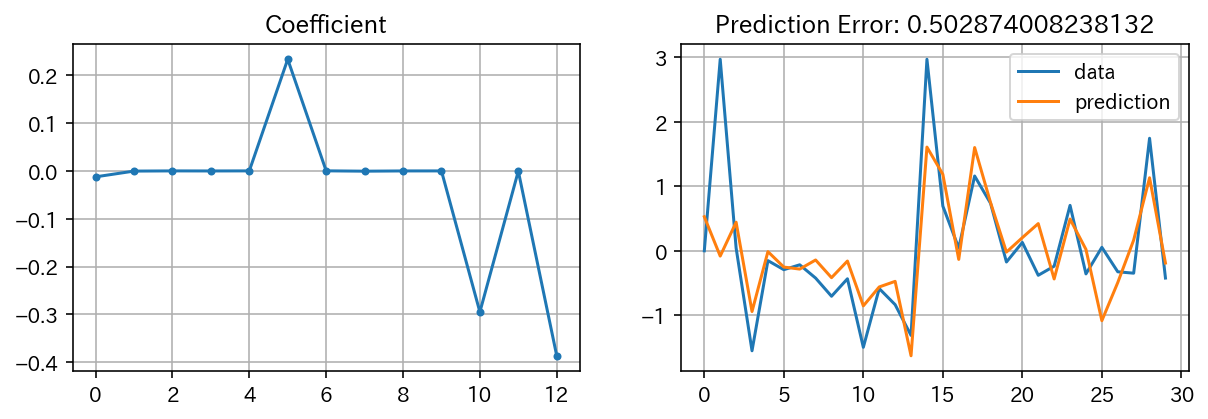

In [13]:
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.plot(hmlasso.coef_, '.-')
plt.grid()
plt.title('Coefficient')
plt.subplot(1,2,2)
plt.plot(y_test[:num_test], label='data')
plt.plot(hmlasso.predict(X_test[:num_test]), label='prediction')
plt.legend()
plt.grid()
plt.title(f'Prediction Error: {hmlasso.score(X_test[:num_test], y_test[:num_test])}')
plt.show()

### HMLasso with center missed data

In [14]:
n_samples, n_features = X_train.shape
X_missed = np.copy(X_train)

# center 25% missed
X_missed[int(0.25*n_samples):int(0.75*n_samples), int(0.25*n_features):int(0.75*n_features)] = np.nan

In [15]:
%%time
hmlasso.fit(X_missed, y_train)

CPU times: user 6.83 ms, sys: 2.49 ms, total: 9.32 ms
Wall time: 4.61 ms


HMLasso(alpha=0.1, mu_cov=0.1)

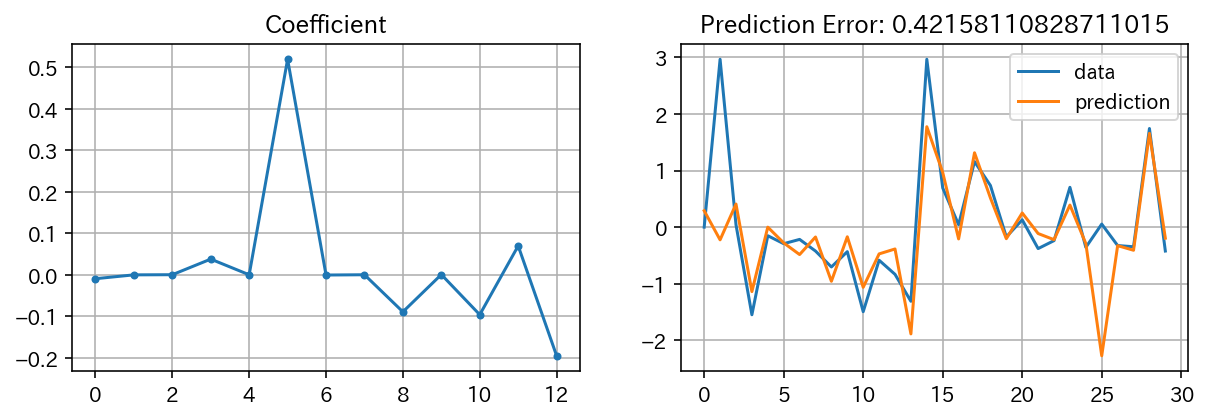

In [16]:
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.plot(hmlasso.coef_, '.-')
plt.grid()
plt.title('Coefficient')
plt.subplot(1,2,2)
plt.plot(y_test[:num_test], label='data')
plt.plot(hmlasso.predict(X_test[:num_test]), label='prediction')
plt.legend()
plt.grid()
plt.title(f'Prediction Error: {hmlasso.score(X_test[:num_test], y_test[:num_test])}')
plt.show()